<a href="https://colab.research.google.com/github/mpc97/pytorch/blob/main/udemy_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1

## Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
import torch
torch.__version__
#!pip install torch==1.4.0

'1.4.0'

In [3]:
import torch.nn as nn

## Datasets

In [4]:
np.random.seed(123)
torch.manual_seed(123)

In [5]:
predictors = pd.read_csv('/content/entradas_breast.csv')
classes = pd.read_csv('/content/saidas_breast.csv')

In [6]:
predictors.shape

(569, 30)

In [7]:
predictors.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1095.0000,0.9053,8589.0,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3398.0,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4585.0,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1156.0000,3445.0,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,0.7572,0.7813,5438.0,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [8]:
classes.shape

(569, 1)

In [9]:
classes.head()

,0
0,0
1,0
2,0
3,0
4,0


In [11]:
np.unique(classes)

array([0, 1])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


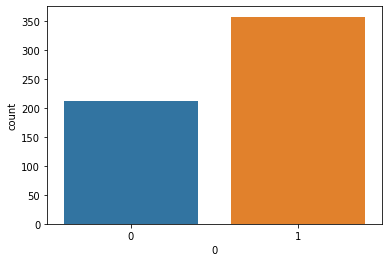

In [13]:
sns.countplot(classes['0']); # O ; no final elimina a mensagem do matplotlib

In [14]:
predictors_train, predictors_test, classes_train, classes_test = train_test_split(predictors,
                                                                                  classes,
                                                                                  test_size=0.25)

In [15]:
predictors_train.shape

(426, 30)

In [16]:
classes_train.shape

(426, 1)

In [17]:
predictors_test.shape

(143, 30)

In [18]:
classes_test.shape

(143, 1)

## Transforming Data -> Tensors

In [21]:
type(predictors_train)

pandas.core.frame.DataFrame

In [20]:
type(np.array(predictors_train))

numpy.ndarray

In [22]:
predictors_train = torch.tensor(np.array(predictors_train), dtype=torch.float) # redefenimos a variável para podermos usar tensors
classes_train = torch.tensor(np.array(classes_train), dtype=torch.float)

In [23]:
type(predictors_train)

torch.Tensor

In [24]:
type(classes_train)

torch.Tensor

In [25]:
dataset = torch.utils.data.TensorDataset(predictors_train, classes_train)

In [26]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [27]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True) 

## Building The Model

In [28]:
# 30 (30 atributos / features) -> 16 -> 16 -> 1 (classificação binária => 1 output unit that returns a probability)
# (input units + output units) / 2 = (30 + 1) / 2 = 16

classifier = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

In [29]:
classifier.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [30]:
criterion = nn.BCELoss()

In [31]:
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001, weight_decay=0.0001)

## Training the Model

In [35]:
# Tensorflow or Keras already have a fit method that trains the model

for epoch in range(100):
  running_loss = 0.

  for data in train_loader:
    inputs, labels = data
    #print(inputs)
    #print('------')
    #print(labels)
    optimizer.zero_grad() # zerar valores acumulados
    outputs = classifier(inputs) # same as calling method classifier.forward(inputs)
    #print(outputs)
    loss = criterion(outputs, labels) # calculating the loss here
    #print(loss)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

  print('Epoch %3d: loss = %.5f' % (epoch+1, running_loss/len(train_loader)))

Epoch   1: loss = 5.92794
Epoch   2: loss = 3.24339
Epoch   3: loss = 0.85878
Epoch   4: loss = 0.61167
Epoch   5: loss = 0.47035
Epoch   6: loss = 0.44825
Epoch   7: loss = 0.44102
Epoch   8: loss = 0.43400
Epoch   9: loss = 0.40682
Epoch  10: loss = 0.44500
Epoch  11: loss = 0.38726
Epoch  12: loss = 0.35729
Epoch  13: loss = 0.36799
Epoch  14: loss = 0.33528
Epoch  15: loss = 0.33873
Epoch  16: loss = 0.32963
Epoch  17: loss = 0.31916
Epoch  18: loss = 0.34986
Epoch  19: loss = 0.31919
Epoch  20: loss = 0.28395
Epoch  21: loss = 0.32570
Epoch  22: loss = 0.28807
Epoch  23: loss = 0.31152
Epoch  24: loss = 0.31926
Epoch  25: loss = 0.30136
Epoch  26: loss = 0.31308
Epoch  27: loss = 0.28840
Epoch  28: loss = 0.29021
Epoch  29: loss = 0.27712
Epoch  30: loss = 0.28186
Epoch  31: loss = 0.27286
Epoch  32: loss = 0.28323
Epoch  33: loss = 0.28469
Epoch  34: loss = 0.26491
Epoch  35: loss = 0.31017
Epoch  36: loss = 0.28422
Epoch  37: loss = 0.27385
Epoch  38: loss = 0.26538
Epoch  39: l

## Visualizing the Weights

In [37]:
# Remembering 30 -> 16 -> 16 -> 1

params = list(classifier.parameters())
print(params)

[Parameter containing:
tensor([[-2.1691e-01, -1.6953e-01, -2.1162e-01,  4.1027e-02, -4.8567e-02,
          7.1689e-02,  8.0329e-02, -1.3262e-01, -2.1249e-01,  2.9104e-01,
         -4.8975e-02,  5.7479e-02, -1.0478e-01, -8.4665e-02, -4.7074e-04,
         -2.7648e-01, -6.2739e-01, -6.2130e-02,  1.1480e-01,  3.2016e-03,
         -3.0342e-02, -1.3882e-01, -7.1458e-02,  1.2867e-01,  4.2950e-01,
          1.3945e-01, -1.3442e-01,  3.6647e-02,  2.5920e-01,  4.8288e-02],
        [ 1.9285e-01,  2.1470e-01,  2.8646e-01,  1.0002e-01, -1.3017e-01,
         -8.3916e-02, -4.5063e-02, -8.6925e-02, -1.5932e-03,  2.2462e-01,
         -5.4426e-02, -1.1319e-01,  5.1726e-04,  1.7627e-01, -2.7512e-03,
         -5.9564e-02, -2.3306e-02,  2.2674e-01,  1.4708e-01, -9.8360e-03,
          9.2020e-02,  7.1132e-02,  1.8902e-01,  1.1297e-02,  6.7670e-02,
         -2.0629e-01, -1.6052e-01,  5.8800e-02, -5.2096e-02, -1.6387e-01],
        [-7.7391e-03, -1.0450e-02, -2.1673e-01, -9.0349e-02, -2.8732e-02,
          6.3

In [40]:
# 30 -> 16 -> 16 -> 1
weights_0 = params[0]
weights_0.shape

torch.Size([16, 30])

In [41]:
print(weights_0)

Parameter containing:
tensor([[-2.1691e-01, -1.6953e-01, -2.1162e-01,  4.1027e-02, -4.8567e-02,
          7.1689e-02,  8.0329e-02, -1.3262e-01, -2.1249e-01,  2.9104e-01,
         -4.8975e-02,  5.7479e-02, -1.0478e-01, -8.4665e-02, -4.7074e-04,
         -2.7648e-01, -6.2739e-01, -6.2130e-02,  1.1480e-01,  3.2016e-03,
         -3.0342e-02, -1.3882e-01, -7.1458e-02,  1.2867e-01,  4.2950e-01,
          1.3945e-01, -1.3442e-01,  3.6647e-02,  2.5920e-01,  4.8288e-02],
        [ 1.9285e-01,  2.1470e-01,  2.8646e-01,  1.0002e-01, -1.3017e-01,
         -8.3916e-02, -4.5063e-02, -8.6925e-02, -1.5932e-03,  2.2462e-01,
         -5.4426e-02, -1.1319e-01,  5.1726e-04,  1.7627e-01, -2.7512e-03,
         -5.9564e-02, -2.3306e-02,  2.2674e-01,  1.4708e-01, -9.8360e-03,
          9.2020e-02,  7.1132e-02,  1.8902e-01,  1.1297e-02,  6.7670e-02,
         -2.0629e-01, -1.6052e-01,  5.8800e-02, -5.2096e-02, -1.6387e-01],
        [-7.7391e-03, -1.0450e-02, -2.1673e-01, -9.0349e-02, -2.8732e-02,
          6.31

In [43]:
bias_0 = params[1]
bias_0.shape

torch.Size([16])

In [44]:
print(bias_0)

Parameter containing:
tensor([-2.3647e-01,  2.6217e-01, -2.3879e-01, -2.4839e-01, -7.1253e-01,
         1.6192e-01,  2.0884e-01, -2.7948e-01, -3.5443e-01,  4.6269e-01,
        -1.6155e-01,  4.0396e-01, -3.2251e-01, -4.7960e-02, -2.8362e-07,
         1.7838e-39], requires_grad=True)


In [46]:
# 30 -> 16 -> 16 -> 1
weights_1 = params[2]
weights_1.shape

torch.Size([16, 16])

In [47]:
bias_1 = params[3]
bias_1.shape

torch.Size([16])

## Model Evaluation

In [48]:
classifier.eval() # We change the MODE of the classifier (turn off math operations that update the weights)

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [49]:
type(predictors_test)

pandas.core.frame.DataFrame

In [50]:
predictors_test = torch.tensor(np.array(predictors_test), dtype=torch.float)

In [51]:
type(predictors_test)

torch.Tensor

In [52]:
predictions = classifier.forward(predictors_test)

In [53]:
predictions

tensor([[9.8378e-01],
        [1.0000e+00],
        [7.5024e-03],
        [8.1037e-01],
        [8.0082e-05],
        [7.4078e-01],
        [6.9757e-01],
        [9.9950e-01],
        [4.0166e-01],
        [4.8078e-01],
        [9.2429e-01],
        [9.9599e-01],
        [9.6478e-01],
        [9.8459e-01],
        [6.9368e-01],
        [4.0131e-01],
        [9.8351e-01],
        [1.0000e+00],
        [4.3887e-01],
        [9.9154e-01],
        [8.7548e-10],
        [5.1082e-03],
        [2.3758e-01],
        [1.0000e+00],
        [7.4136e-01],
        [2.0102e-03],
        [2.7345e-01],
        [1.0000e+00],
        [1.6772e-04],
        [9.9337e-01],
        [1.7626e-01],
        [9.9969e-01],
        [6.8448e-01],
        [9.4162e-01],
        [8.3841e-03],
        [9.9253e-01],
        [2.0310e-01],
        [9.9528e-01],
        [9.9858e-01],
        [3.3898e-05],
        [7.7274e-03],
        [5.2976e-01],
        [4.0029e-07],
        [1.5170e-01],
        [2.1851e-04],
        [4

In [54]:
predictions = np.array(predictions > 0.5)
predictions

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [55]:
classes_test.head()

,0
333,1
273,1
201,0
178,1
85,0


In [56]:
hit_rate = accuracy_score(classes_test, predictions)
hit_rate

0.8811188811188811

In [57]:
matrix = confusion_matrix(classes_test, predictions)
matrix

array([[48,  6],
       [11, 78]])

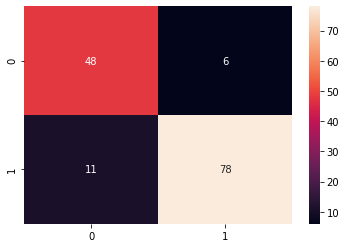

In [58]:
sns.heatmap(matrix, annot=True);